In [1]:
# for reading csv & plotting
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# for spliting data
from sklearn.model_selection import train_test_split

# for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# for metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Error suppression
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, message="The behavior of DataFrame concatenation with empty or all-NA entries is deprecated")

In [2]:
import os
cwd = os.getcwd()
cwd

'/Users/irsyadfikriansyah/Downloads/New Folder With Items'

In [3]:
# Load DataFrame
df = pd.read_csv('dataset/filtered_bald_probability.csv')
df1 = pd.read_csv('dataset/forward_bald_probability.csv')
df2 = pd.read_csv('dataset/backwards_bald_probability.csv')
dfall = pd.read_csv('dataset/all_bald_probability.csv')

# bald_prob sudah menjadi kategori

# Memisahkan data menjadi training dan testing set (dengan proporsi 3:1)
train_data, test_data = train_test_split(df, test_size=0.25, random_state=1)
train_data1, test_data1 = train_test_split(df1, test_size=0.25, random_state=1)
train_data2, test_data2 = train_test_split(df2, test_size=0.25, random_state=1)
train_data_all, test_data_all = train_test_split(dfall, test_size=0.25, random_state=1)

results = pd.DataFrame(columns=['dataset', 'Model', 'accuracy', 'precision', 'recall', 'f1'])

In [4]:
dfall

,Unnamed: 0,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,0,27.0,0,1,5,7.957453e+06,1.0,0.0,54.315053,170.428542,3,1.0,0,5.0,high
1,1,53.0,0,1,3,7.633003e+06,1.0,0.0,72.873404,165.530097,3,0.0,0,7.0,medium
2,2,37.0,0,0,3,6.637625e+06,1.0,0.0,46.321533,154.599388,2,0.0,0,4.0,medium
3,3,36.0,0,2,22,3.624871e+06,1.0,0.0,51.539781,167.340481,0,1.0,2,9.0,high
4,5,55.0,0,1,20,9.213032e+06,1.0,1.0,54.287045,179.235145,3,0.0,0,1.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,7830,52.0,1,1,16,4.286318e+06,1.0,0.0,46.893444,169.880171,0,1.0,5,2.0,high
5780,7831,45.0,1,1,32,8.646146e+06,1.0,0.0,53.878714,170.122857,3,0.0,0,2.0,high
5781,7832,24.0,1,1,9,6.850066e+06,1.0,0.0,64.171294,161.384804,2,0.0,5,8.0,medium
5782,7833,29.0,1,0,20,1.204960e+07,1.0,0.0,55.217752,179.602130,3,1.0,5,6.0,medium


In [5]:
def min_max_normalization(df):
    return (df - df.min()) / (df.max() - df.min())

# Fungsi untuk menggambar confusion matrix dan menampilkan evaluasi metrik
def print_evaluation_metrics(dataset_name, y_true, y_pred, model_name, results, normalized=False):
    # Define the order of categories
    categories = ['low', 'medium', 'high']

    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=categories)
    # print("Confusion Matrix:")
    
    # Confusion matrix visualization
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    title = f'{dataset_name} {model_name} {"[Normalized]" if normalized else "[Not Normalized]"}'
    plt.title(title)
    plt.show()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Displaying evaluation metrics
    # print("\nAccuracy\t:", accuracy)
    # print("Precision\t:", precision)
    # print("Recall\t\t:", recall)
    # print("F1-Score\t:", f1)

    new_row = pd.DataFrame({
        'dataset': [dataset_name],
        'Model': [model_name + ' [normalized]' if normalized else model_name], 
        'accuracy': [accuracy], 
        'precision': [precision], 
        'recall': [recall], 
        'f1': [f1]
    })

    # Concatenate the new row with the results DataFrame
    results = pd.concat([results, new_row], ignore_index=True)

    return results

In [6]:
df.head()
df1.head()
df2.head()

,Unnamed: 0,age,is_hereditary,height,is_smoker,stress,bald_prob
0,0,27.0,0.0,170.428542,1.0,5.0,high
1,1,53.0,0.0,165.530097,0.0,7.0,medium
2,2,37.0,0.0,154.599388,0.0,4.0,medium
3,3,36.0,0.0,167.340481,1.0,9.0,high
4,5,55.0,1.0,179.235145,0.0,1.0,high


In [7]:
# filtered (spearman)
x_train = train_data.drop(['bald_prob'], axis=1)
y_train = train_data['bald_prob']

x_test = test_data.drop(['bald_prob'], axis=1)
y_test = test_data['bald_prob']

x_train_normalized = x_train.apply(min_max_normalization)
x_test_normalized = x_test.apply(min_max_normalization)

# forward
x_train1 = train_data1.drop(['bald_prob'], axis=1)
y_train1 = train_data1['bald_prob']

x_test1 = test_data1.drop(['bald_prob'], axis=1)
y_test1 = test_data1['bald_prob']

x_train_normalized1 = x_train1.apply(min_max_normalization)
x_test_normalized1 = x_test1.apply(min_max_normalization)

# backwards
x_train2 = train_data2.drop(['bald_prob'], axis=1)
y_train2 = train_data2['bald_prob']

x_test2 = test_data2.drop(['bald_prob'], axis=1)
y_test2 = test_data2['bald_prob']

x_train_normalized2 = x_train2.apply(min_max_normalization)
x_test_normalized2 = x_test2.apply(min_max_normalization)

# all features
x_train_all = train_data_all.drop(['bald_prob'], axis=1)
y_train_all = train_data_all['bald_prob']

x_test_all = test_data_all.drop(['bald_prob'], axis=1)
y_test_all = test_data_all['bald_prob']

x_train_normalized_all = x_train_all.apply(min_max_normalization)
x_test_normalized_all = x_test_all.apply(min_max_normalization)

In [8]:
# Initialize models with different criteria
models = {
    'Decision Tree (Gini)': DecisionTreeClassifier(criterion='gini', random_state=1),
    'Decision Tree (Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=1),
    'Random Forest (Gini)': RandomForestClassifier(criterion='gini', random_state=1),
    'Random Forest (Entropy)': RandomForestClassifier(criterion='entropy', random_state=1),
    'SCV (linear)': Pipeline(steps=[('classifier', SVC(kernel='linear'))]),
    'SCV (poly)': Pipeline(steps=[('classifier', SVC(kernel='poly'))]),
    'SCV (rbf)': Pipeline(steps=[('classifier', SVC(kernel='rbf'))]),
    'SCV (sigmoid)': Pipeline(steps=[('classifier', SVC(kernel='sigmoid'))]),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7),
}

In [9]:
y_train

5049    medium
3504    medium
998     medium
5224    medium
4882      high
         ...  
905       high
5192      high
3980      high
235       high
5157      high
Name: bald_prob, Length: 4338, dtype: object

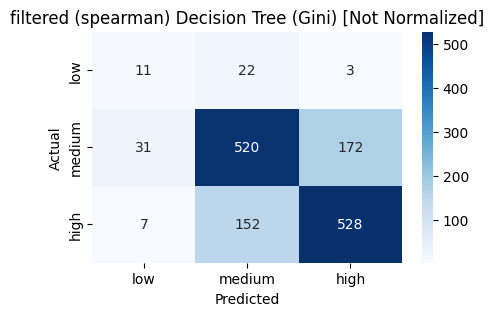

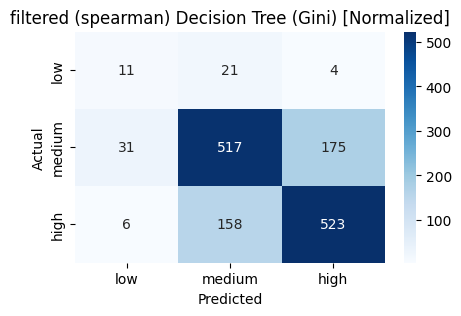

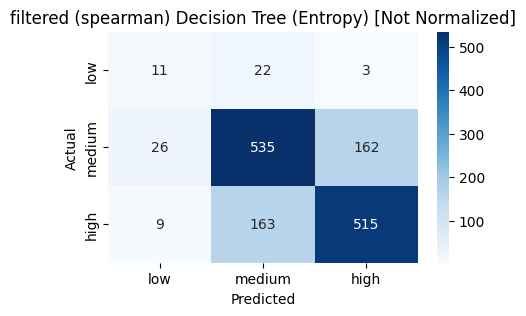

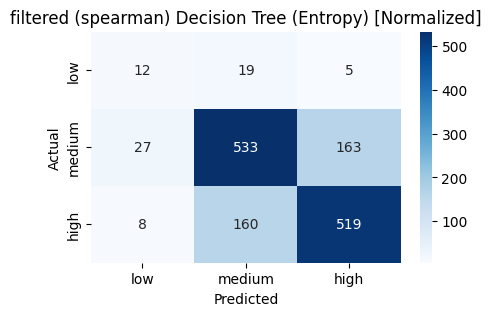

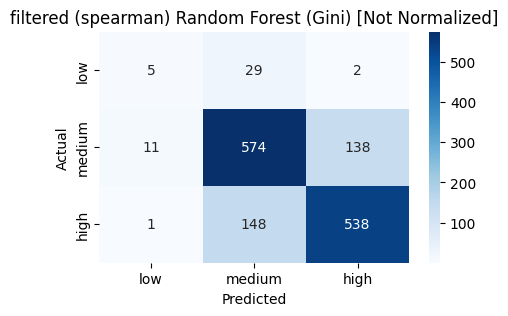

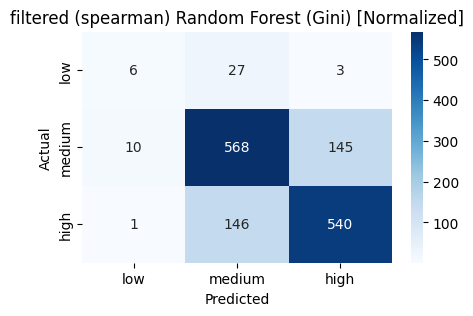

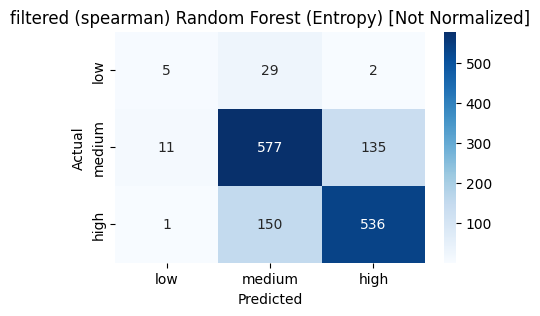

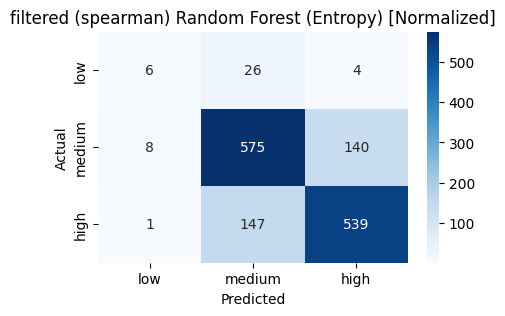

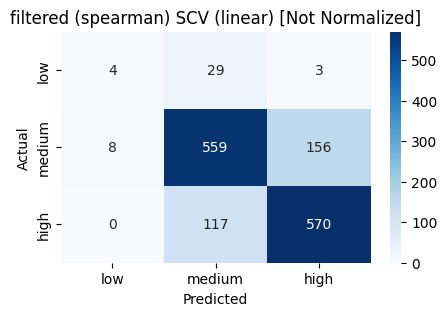

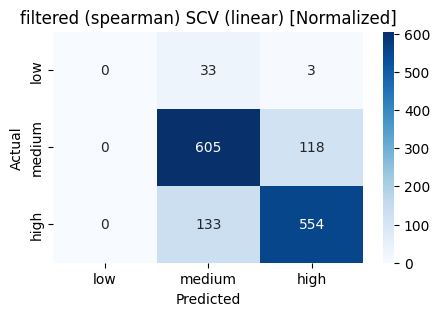

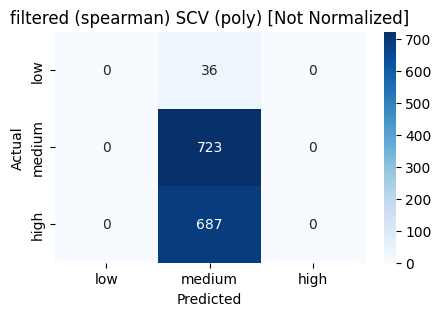

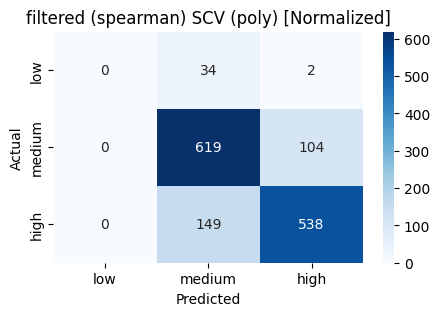

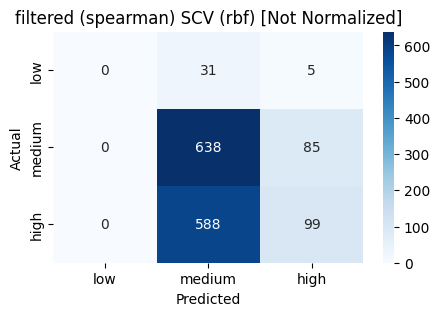

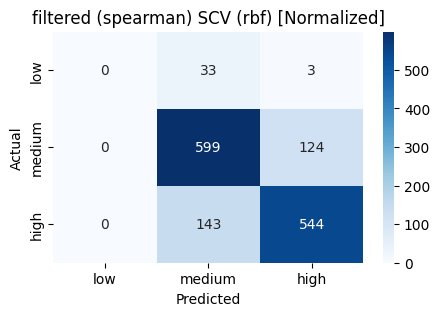

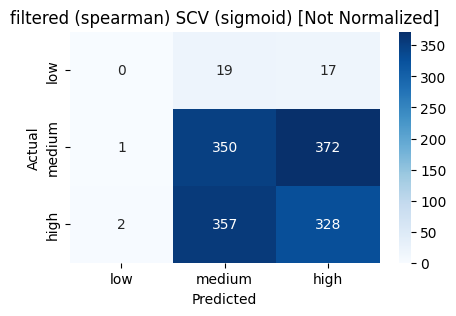

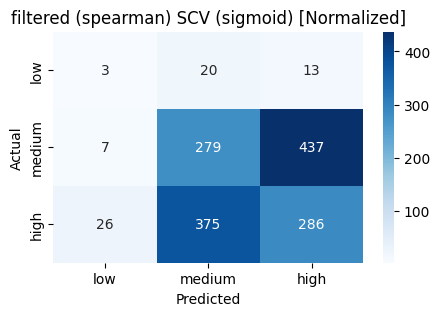

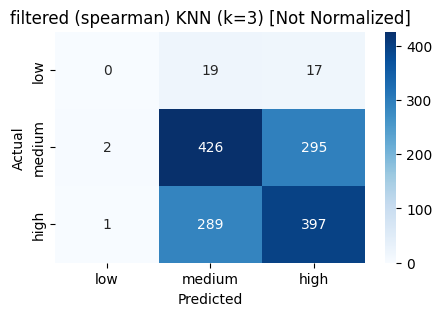

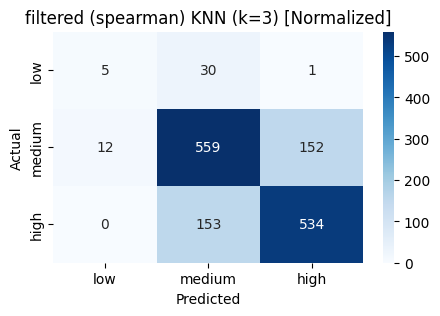

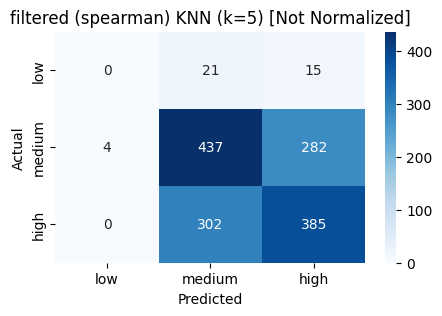

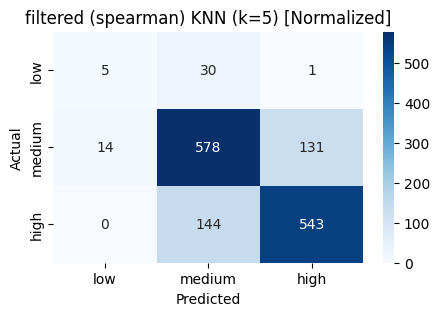

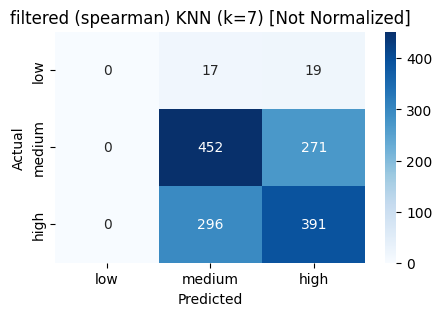

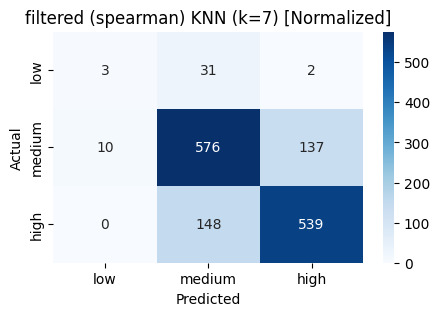

In [10]:
# filtered (spearman)
# Evaluasi setiap model
for model_name, model in models.items():
    # Training model
    model.fit(x_train, y_train)

    # Prediksi menggunakan data test
    y_pred = model.predict(x_test)

    # Evaluasi model dengan metrik evaluasi
    results = print_evaluation_metrics('filtered (spearman)', y_test, y_pred, model_name, results)

    model.fit(x_train_normalized, y_train)
    y_pred = model.predict(x_test_normalized)
    results = print_evaluation_metrics('filtered (spearman)', y_test, y_pred, model_name, results, normalized=True)

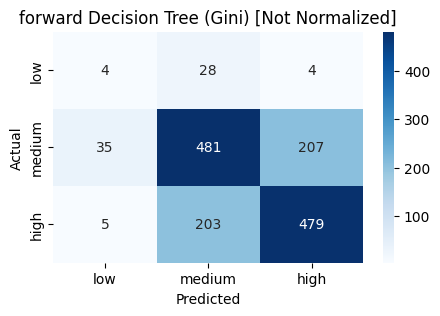

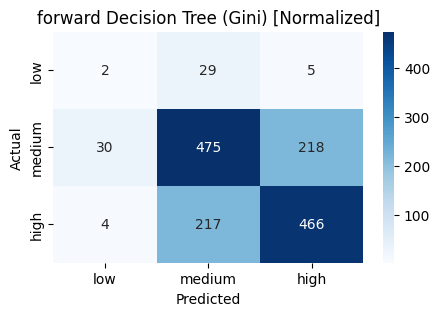

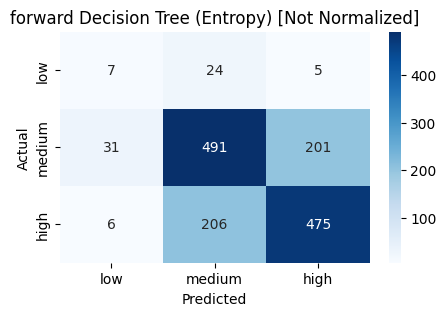

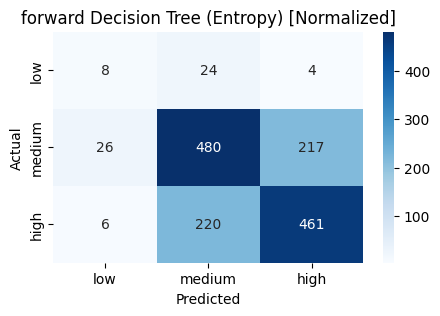

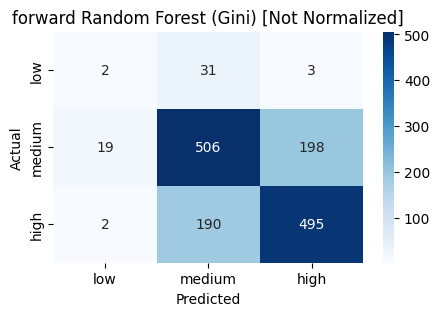

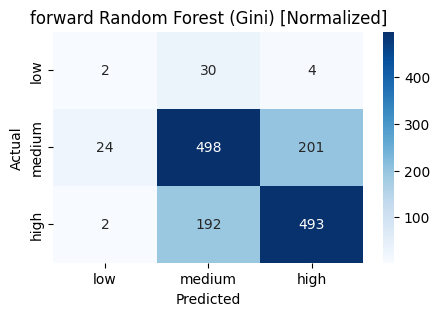

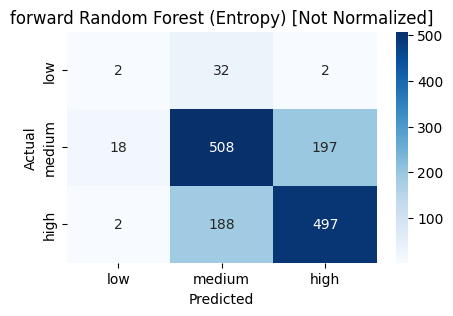

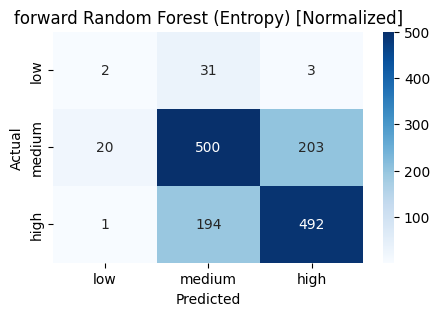

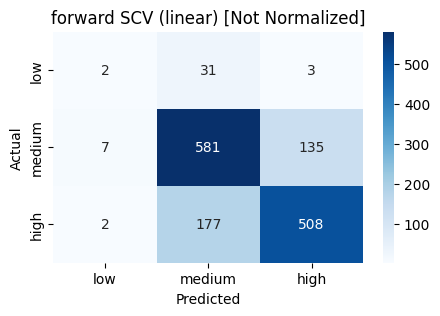

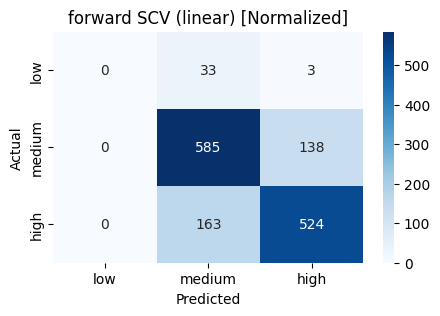

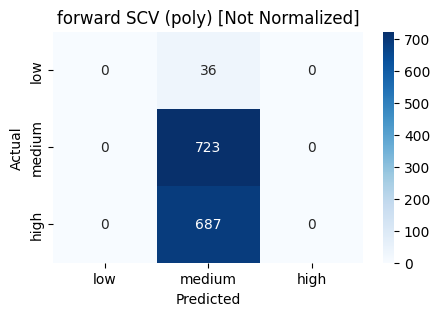

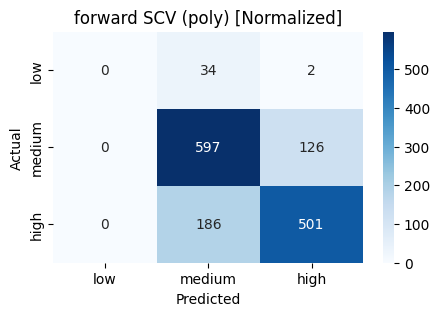

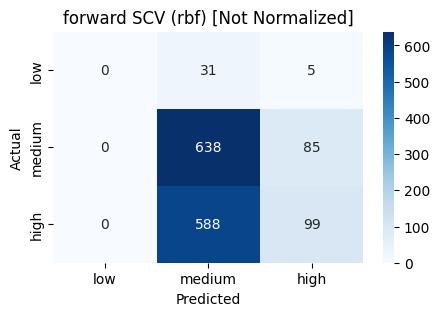

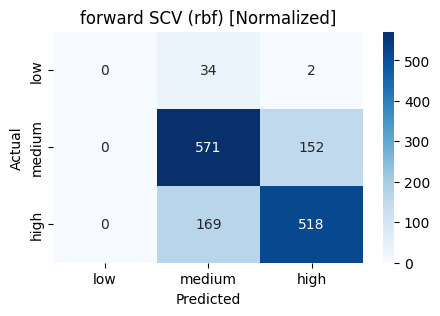

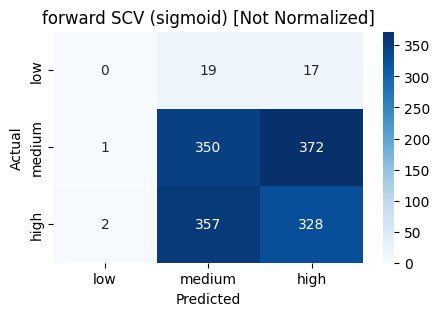

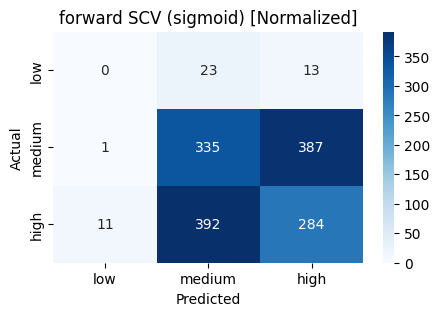

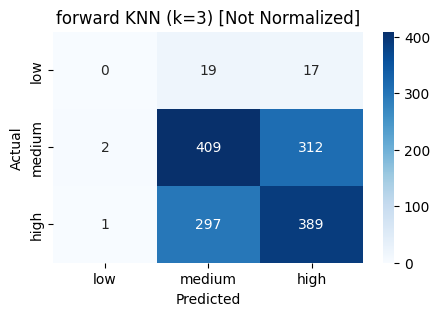

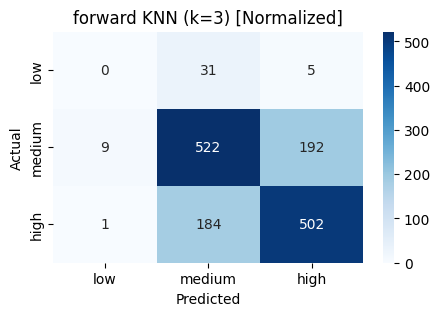

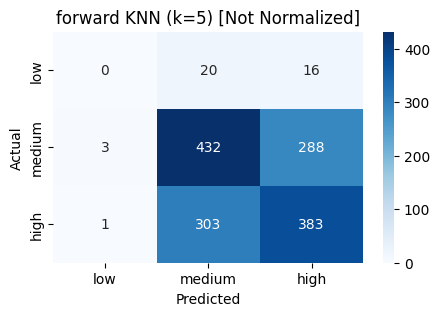

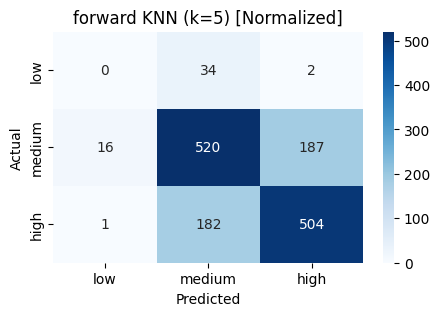

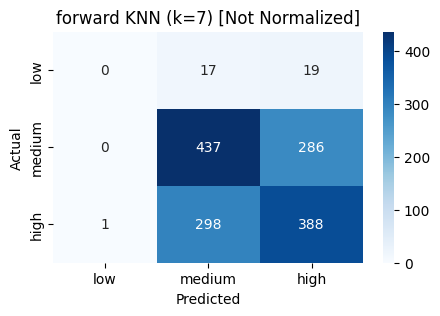

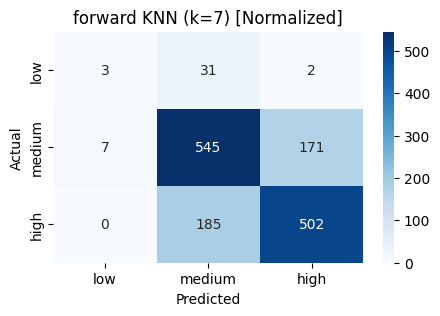

In [11]:
# forward
# Evaluasi setiap model
for model_name, model in models.items():
    # Training model
    model.fit(x_train1, y_train1)

    # Prediksi menggunakan data test
    y_pred1 = model.predict(x_test1)

    # Evaluasi model dengan metrik evaluasi
    results = print_evaluation_metrics('forward', y_test1, y_pred1, model_name, results)

    model.fit(x_train_normalized1, y_train1)
    y_pred1 = model.predict(x_test_normalized1)
    results = print_evaluation_metrics('forward', y_test1, y_pred1, model_name, results, normalized=True)

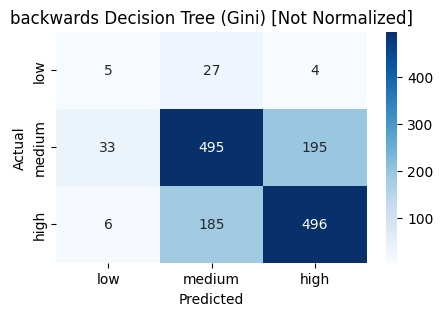

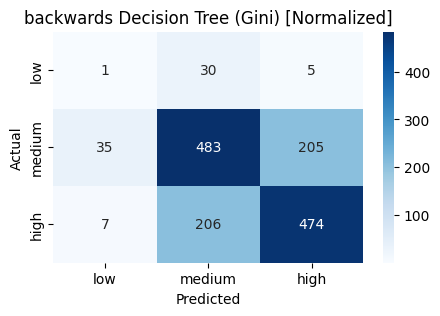

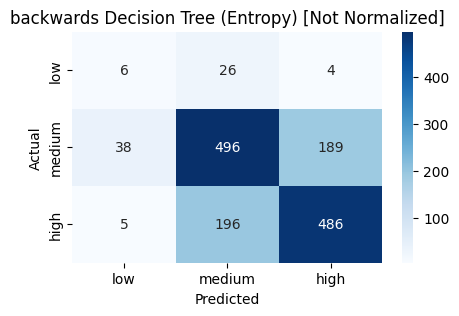

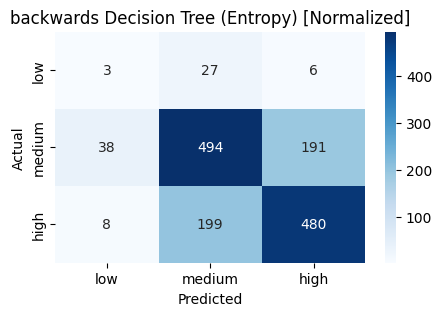

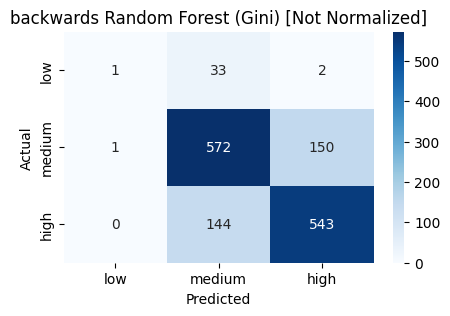

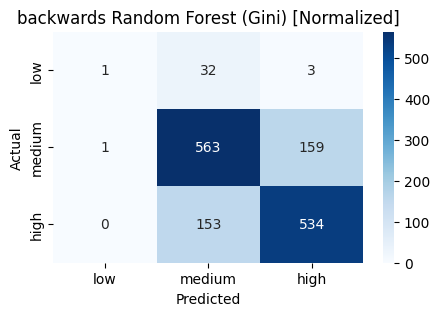

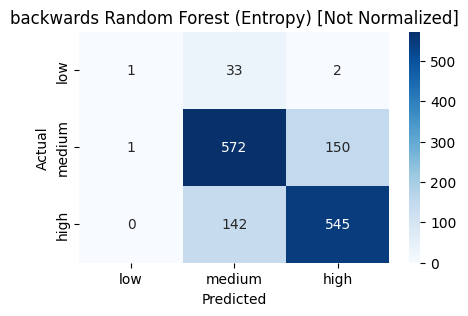

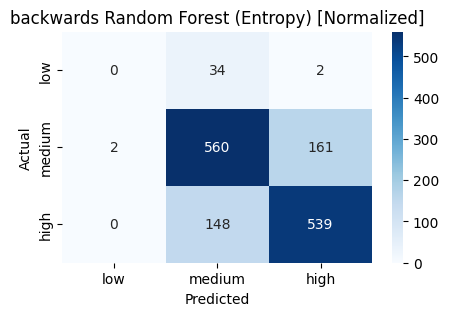

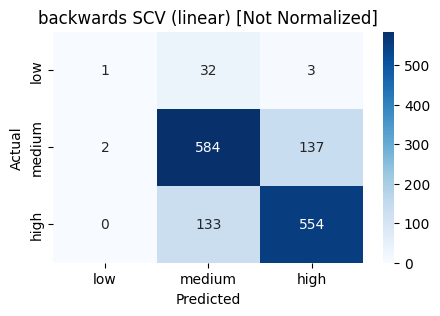

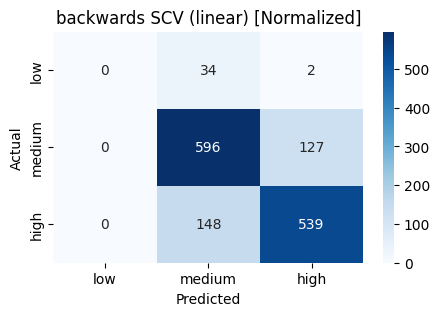

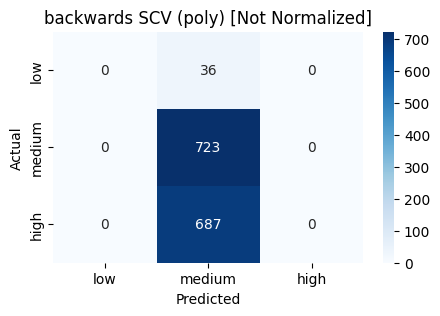

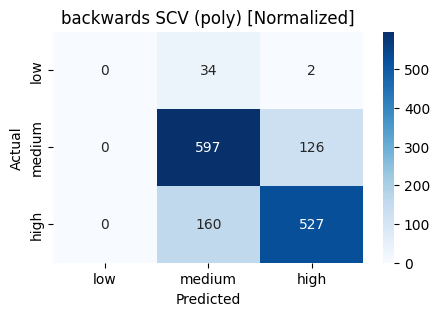

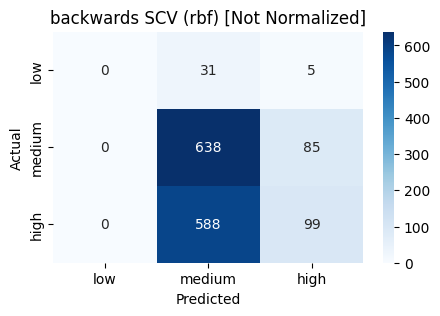

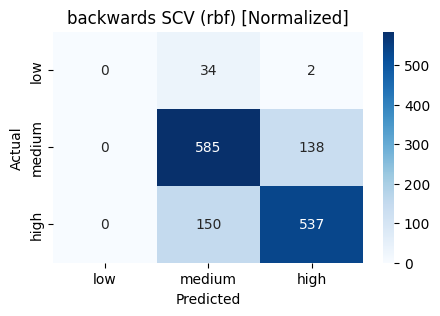

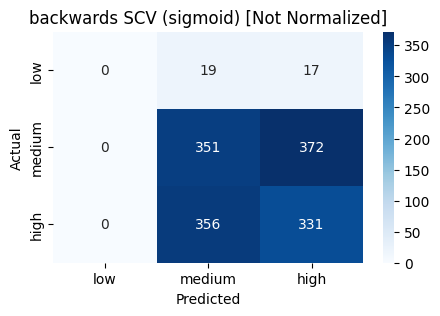

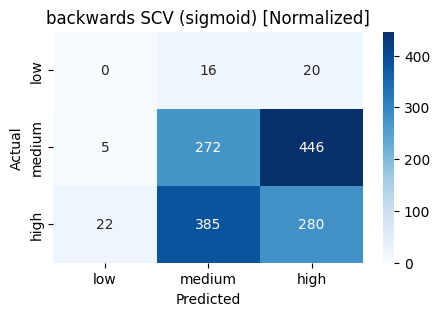

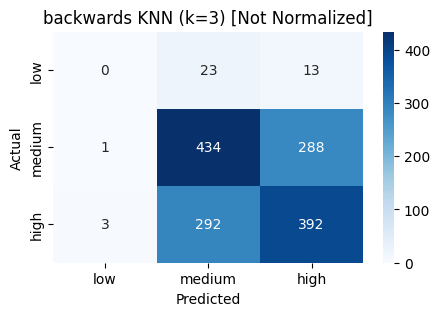

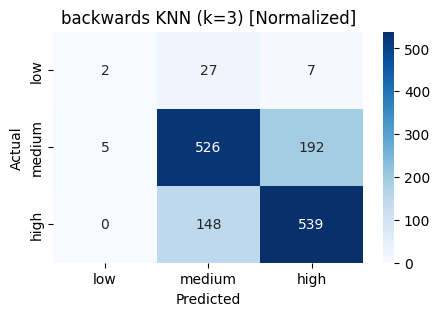

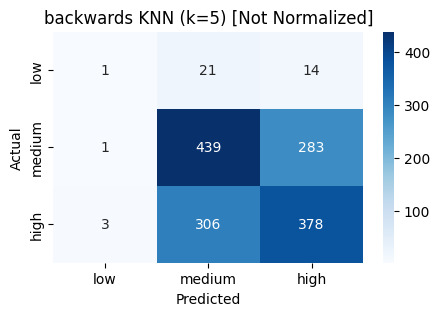

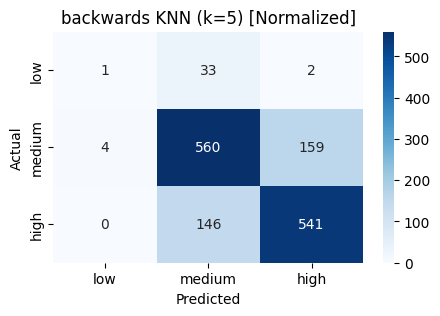

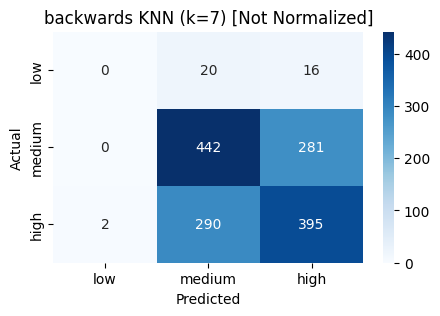

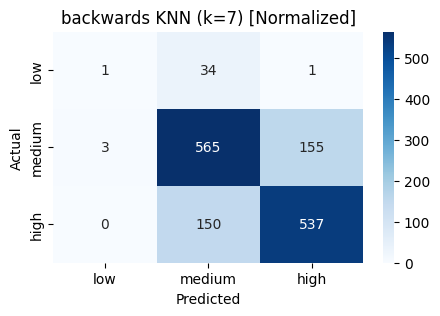

In [12]:
# backwards
# Evaluasi setiap model
for model_name, model in models.items():
    # Training model
    model.fit(x_train2, y_train2)

    # Prediksi menggunakan data test
    y_pred2 = model.predict(x_test2)

    # Evaluasi model dengan metrik evaluasi
    results = print_evaluation_metrics('backwards', y_test2, y_pred2, model_name, results)

    model.fit(x_train_normalized2, y_train2)
    y_pred2 = model.predict(x_test_normalized2)
    results = print_evaluation_metrics('backwards', y_test2, y_pred2, model_name, results, normalized=True)

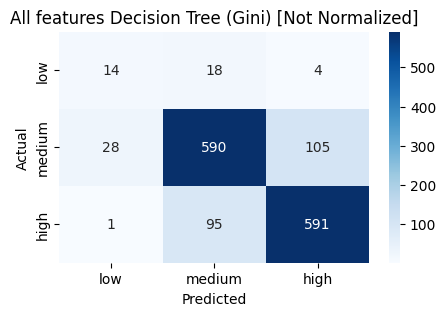

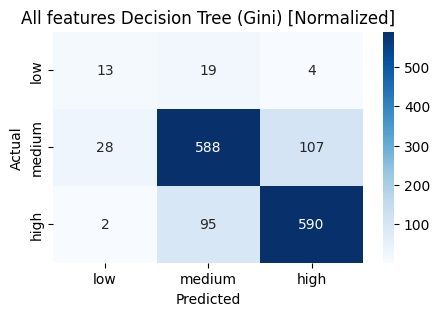

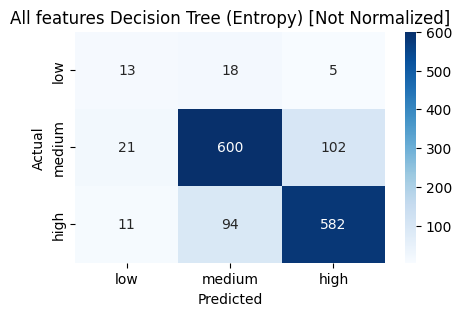

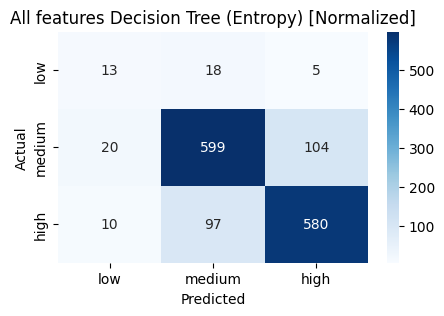

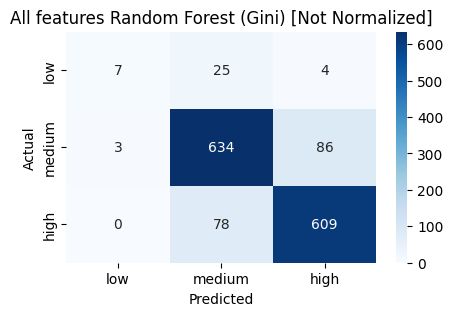

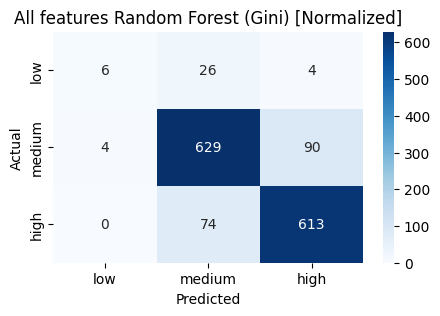

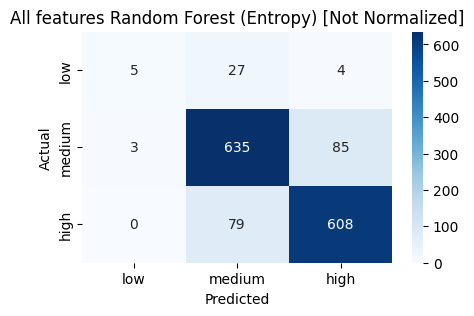

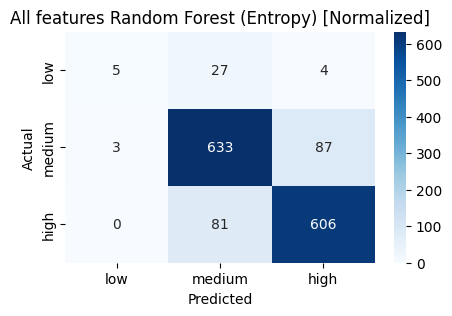

In [13]:
# all features
# Evaluasi setiap model
for model_name, model in models.items():
    # Training model
    model.fit(x_train_all, y_train_all)

    # Prediksi menggunakan data test
    y_pred_all = model.predict(x_test_all)

    # Evaluasi model dengan metrik evaluasi
    results = print_evaluation_metrics('All features', y_test_all, y_pred_all, model_name, results)

    model.fit(x_train_normalized_all, y_train_all)
    y_pred_all = model.predict(x_test_normalized_all)
    results = print_evaluation_metrics('All features', y_test_all, y_pred_all, model_name, results, normalized=True)

In [ ]:
results

In [ ]:
results.to_csv('dataset/all-result.csv', mode='w', header=True, index=False)